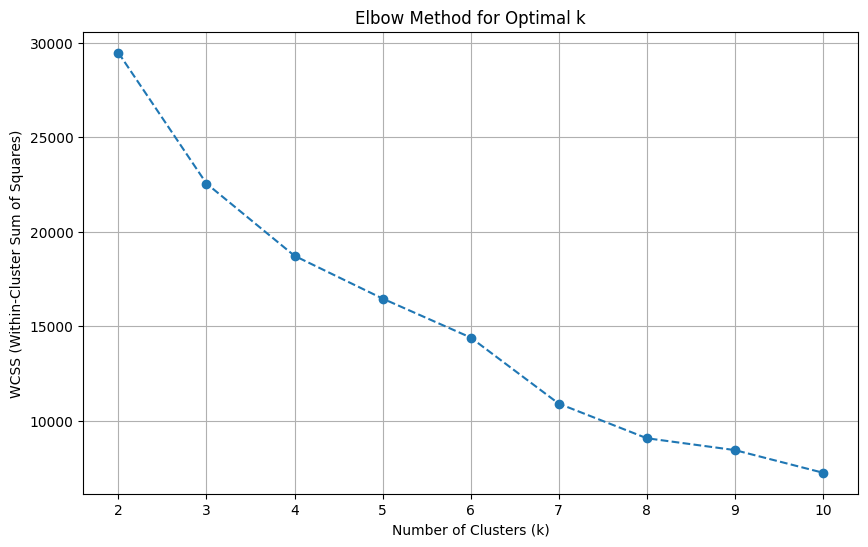

Silhouette Score (Clustering Quality): 0.32

Cluster Distribution:
Cluster
1    16
0    15
2     9
Name: count, dtype: int64

Note: Data has more than 2 features. Consider PCA for visualization.


In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('weather_data.csv')


le = LabelEncoder()
for col in data.columns:
    data[col] = le.fit_transform(data[col])


X = data.copy() 


wcss = []  # 
possible_k = range(2, 11)  

for k in possible_k:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  


plt.figure(figsize=(10, 6))
plt.plot(possible_k, wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal k')
plt.grid()
plt.show()


best_k = 3 


kmeans = KMeans(n_clusters=best_k, random_state=42)
clusters = kmeans.fit_predict(X)


data['Cluster'] = clusters


silhouette_avg = silhouette_score(X, clusters)
print(f"Silhouette Score (Clustering Quality): {silhouette_avg:.2f}")


print("\nCluster Distribution:")
print(data['Cluster'].value_counts())


if X.shape[1] == 2:  
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=clusters, cmap='viridis')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('K-Means Clustering Results')
    plt.colorbar(label='Cluster')
    plt.show()
else:
    print("\nNote: Data has more than 2 features. Consider PCA for visualization.")